In [60]:
import cv2 
import os 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
from sklearn.model_selection import train_test_split

In [38]:
cam = cv2.VideoCapture(r"C:\Users\SKAN\Desktop\video_dataset\test\dirtyfloor\WhatsApp Video 2024-03-26 at 16.39.19_8e89b519.mp4") 

In [39]:
try: 
      
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 
  

In [40]:
# frame 
currentframe = 0
  
while(True): 
      
    # reading from frame 
    ret,frame = cam.read() 
  
    if ret: 
        # if video is still left continue creating images 
        name = r'C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break

Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_0.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_1.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_2.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_3.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_4.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_5.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_6.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_7.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_8.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_9.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_10.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_11.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_12.jpg
Creating...C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_13.jpg
Cr

In [52]:
clean_floor_files = os.listdir(r'C:\Users\SKAN\Desktop\image_dataset\cleanfloor')
print(clean_floor_files[0:5])
print(clean_floor_files[-5:])

['frame100.jpg', 'frame101.jpg', 'frame102.jpg', 'frame103.jpg', 'frame104.jpg']
['frame962.jpg', 'frame963.jpg', 'frame97.jpg', 'frame98.jpg', 'frame99.jpg']


In [53]:
dirty_floor_files = os.listdir(r'C:\Users\SKAN\Desktop\image_dataset\dirtyfloor')
print(dirty_floor_files[0:10])
print(dirty_floor_files[-5:])

['frame0.jpg', 'frame1.jpg', 'frame10.jpg', 'frame1000.jpg', 'frame1001.jpg', 'frame1002.jpg', 'frame1003.jpg', 'frame1004.jpg', 'frame1005.jpg', 'frame1006.jpg']
['frame995.jpg', 'frame996.jpg', 'frame997.jpg', 'frame998.jpg', 'frame999.jpg']


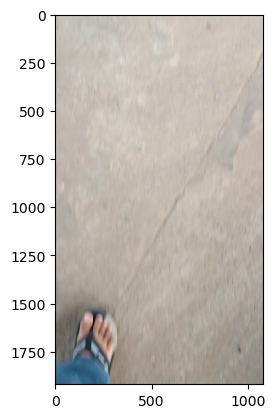

In [46]:
img = mpimg.imread(r'C:\Users\SKAN\Desktop\image_dataset\cleanfloor\frame101.jpg')
imgplot = plt.imshow(img)
plt.show()

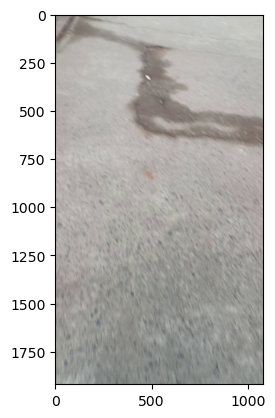

In [47]:
img = mpimg.imread(r'C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame999.jpg')
imgplot = plt.imshow(img)
plt.show()

In [54]:
print('Number of clean_floor images:', len(clean_floor_files))
print('Number of dirty_floor images:', len(dirty_floor_files))

Number of clean_floor images: 3077
Number of dirty_floor images: 2200


In [55]:
# create the labels

clean_floor_labels = [1]*3077

dirty_floor_labels = [0]*2200

In [56]:
print(clean_floor_labels[0:5])

print(dirty_floor_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [57]:
print(len(clean_floor_labels))
print(len(dirty_floor_labels))

3077
2200


In [71]:
labels = clean_floor_labels + dirty_floor_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

5277
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [63]:
# convert images to numpy arrays+

clean_floor_path = 'C:\\Users\\SKAN\\Desktop\\image_dataset\\cleanfloor\\'

data = []

for img_file in clean_floor_files:

  image = Image.open(clean_floor_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [64]:
dirty_floor_path = 'C:\\Users\\SKAN\\Desktop\\image_dataset\\dirtyfloor\\'


for img_file in dirty_floor_files:

  image = Image.open(dirty_floor_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [65]:
type(data)

list

In [66]:
len(data)

5277

In [67]:
data[0]

array([[[196, 193, 186],
        [197, 194, 187],
        [197, 194, 187],
        ...,
        [203, 196, 186],
        [202, 197, 188],
        [202, 197, 188]],

       [[195, 192, 185],
        [198, 195, 188],
        [197, 194, 187],
        ...,
        [201, 194, 184],
        [201, 195, 185],
        [203, 196, 186]],

       [[198, 195, 186],
        [200, 196, 189],
        [196, 193, 186],
        ...,
        [204, 197, 187],
        [203, 196, 186],
        [201, 194, 184]],

       ...,

       [[ 60, 114, 146],
        [ 60, 115, 146],
        [ 64, 116, 147],
        ...,
        [139, 139, 131],
        [135, 136, 128],
        [135, 135, 127]],

       [[ 67, 117, 150],
        [ 69, 119, 151],
        [ 71, 121, 151],
        ...,
        [136, 135, 127],
        [133, 134, 126],
        [131, 132, 124]],

       [[ 73, 124, 157],
        [ 75, 124, 156],
        [ 70, 120, 151],
        ...,
        [135, 131, 122],
        [134, 133, 125],
        [125, 126, 120]]

In [68]:
type(data[0])

numpy.ndarray

In [69]:
data[0].shape

(128, 128, 3)

In [72]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [73]:
type(X)

numpy.ndarray

In [74]:
type(Y)

numpy.ndarray

In [75]:
print(X.shape)
print(Y.shape)

(5277, 128, 128, 3)
(5277,)


In [76]:
print(Y)

[1 1 1 ... 0 0 0]


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(5277, 128, 128, 3) (4221, 128, 128, 3) (1056, 128, 128, 3)


In [79]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [80]:
X_train[0]

array([[[ 50,  49,  47],
        [ 52,  51,  49],
        [ 53,  52,  50],
        ...,
        [ 47,  46,  44],
        [ 47,  46,  44],
        [ 47,  46,  44]],

       [[175, 168, 154],
        [179, 172, 158],
        [181, 174, 160],
        ...,
        [158, 152, 138],
        [158, 152, 138],
        [158, 151, 137]],

       [[176, 169, 154],
        [178, 171, 156],
        [179, 172, 157],
        ...,
        [157, 150, 135],
        [157, 150, 135],
        [158, 151, 136]],

       ...,

       [[144, 138, 119],
        [144, 138, 119],
        [144, 138, 119],
        ...,
        [114, 110,  95],
        [114, 111,  95],
        [114, 111,  95]],

       [[143, 138, 120],
        [143, 138, 120],
        [142, 137, 120],
        ...,
        [114, 111,  94],
        [114, 111,  94],
        [114, 111,  94]],

       [[ 43,  39,  36],
        [ 43,  39,  36],
        [ 43,  39,  36],
        ...,
        [ 35,  32,  29],
        [ 35,  32,  29],
        [ 35,  32,  29]]

In [81]:
X_train_scaled[0]

array([[[0.19607843, 0.19215686, 0.18431373],
        [0.20392157, 0.2       , 0.19215686],
        [0.20784314, 0.20392157, 0.19607843],
        ...,
        [0.18431373, 0.18039216, 0.17254902],
        [0.18431373, 0.18039216, 0.17254902],
        [0.18431373, 0.18039216, 0.17254902]],

       [[0.68627451, 0.65882353, 0.60392157],
        [0.70196078, 0.6745098 , 0.61960784],
        [0.70980392, 0.68235294, 0.62745098],
        ...,
        [0.61960784, 0.59607843, 0.54117647],
        [0.61960784, 0.59607843, 0.54117647],
        [0.61960784, 0.59215686, 0.5372549 ]],

       [[0.69019608, 0.6627451 , 0.60392157],
        [0.69803922, 0.67058824, 0.61176471],
        [0.70196078, 0.6745098 , 0.61568627],
        ...,
        [0.61568627, 0.58823529, 0.52941176],
        [0.61568627, 0.58823529, 0.52941176],
        [0.61960784, 0.59215686, 0.53333333]],

       ...,

       [[0.56470588, 0.54117647, 0.46666667],
        [0.56470588, 0.54117647, 0.46666667],
        [0.56470588, 0

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [84]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [85]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10


119/119 [==============================] - 115s 846ms/step - loss: 0.6910 - acc: 0.6040 - val_loss: 0.6120 - val_acc: 0.7400
Epoch 2/10
119/119 [==============================] - 98s 824ms/step - loss: 0.4354 - acc: 0.8207 - val_loss: 0.2756 - val_acc: 0.9196
Epoch 3/10
119/119 [==============================] - 99s 830ms/step - loss: 0.2060 - acc: 0.9505 - val_loss: 0.2118 - val_acc: 0.9291
Epoch 4/10
119/119 [==============================] - 103s 863ms/step - loss: 0.1277 - acc: 0.9658 - val_loss: 0.1414 - val_acc: 0.9480
Epoch 5/10
119/119 [==============================] - 127s 1s/step - loss: 0.1284 - acc: 0.9668 - val_loss: 0.1425 - val_acc: 0.9504
Epoch 6/10
119/119 [==============================] - 118s 992ms/step - loss: 0.1079 - acc: 0.9731 - val_loss: 0.1231 - val_acc: 0.9480
Epoch 7/10
119/119 [==============================] - 121s 1s/step - loss: 0.1043 - acc: 0.9697 - val_loss: 0.2647 - val_acc: 0.9385
Epoch 8/10
119/119 [==============================] - 

In [86]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

33/33 [==============================] - 8s 246ms/step - loss: 0.0932 - acc: 0.9725
Test Accuracy = 0.9725378751754761


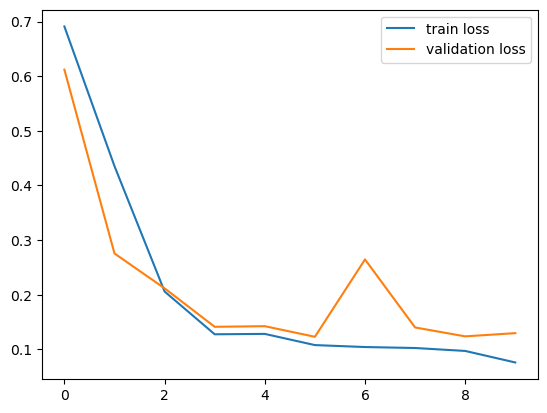

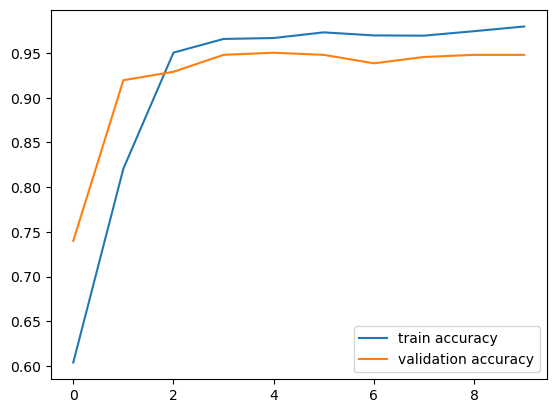

In [87]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: C:\Users\SKAN\Desktop\image_dataset\cleanfloor\frame101.jpg
1/1 [==============================] - 0s 239ms/step
[[0.0071594 0.9726785]]
1
The floor in the image is clean


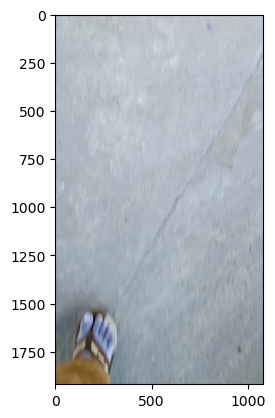

In [89]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The floor in the image is clean')

else:

  print('The floor in the image is dirty')

Path of the image to be predicted: C:\Users\SKAN\Desktop\image_dataset\dirtyfloor\frame1_1034.jpg
1/1 [==============================] - 0s 38ms/step
[[9.9961764e-01 9.9436314e-05]]
0
The floor in the image is dirty


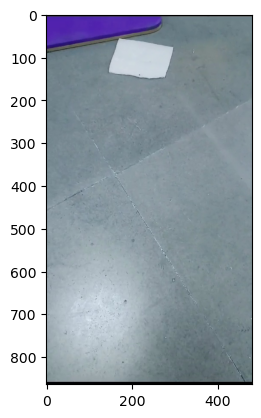

In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The floor in the image is clean')

else:

  print('The floor in the image is dirty')